In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [3]:
df = pd.read_csv("../data/cases_train.csv")

In [14]:
# see what the dataframe looks like
df.head(2)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.61474,77.20910,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.43609,81.84718,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized


## Statistical information

In [43]:
categorical_attributes = ['age', 'sex', 'province', 'country', 'source', 'outcome']
for attribute in categorical_attributes:    
    print(f"statistics for {attribute} column")
    print(df[attribute].describe())
    print("-------------------------")

statistics for age column
count     158371
unique       337
top        35-59
freq       10785
Name: age, dtype: object
-------------------------
statistics for sex column
count     160552
unique         2
top         male
freq       88635
Name: sex, dtype: object
-------------------------
statistics for province column
count          363530
unique           1106
top       Maharashtra
freq            74894
Name: province, dtype: object
-------------------------
statistics for country column
count     367618
unique       131
top        India
freq      212411
Name: country, dtype: object
-------------------------
statistics for source column
count           239158
unique            7250
top       PH Data Drop
freq             10834
Name: source, dtype: object
-------------------------
statistics for outcome column
count              367636
unique                  4
top       nonhospitalized
freq               150000
Name: outcome, dtype: object
-------------------------


## Visualizations

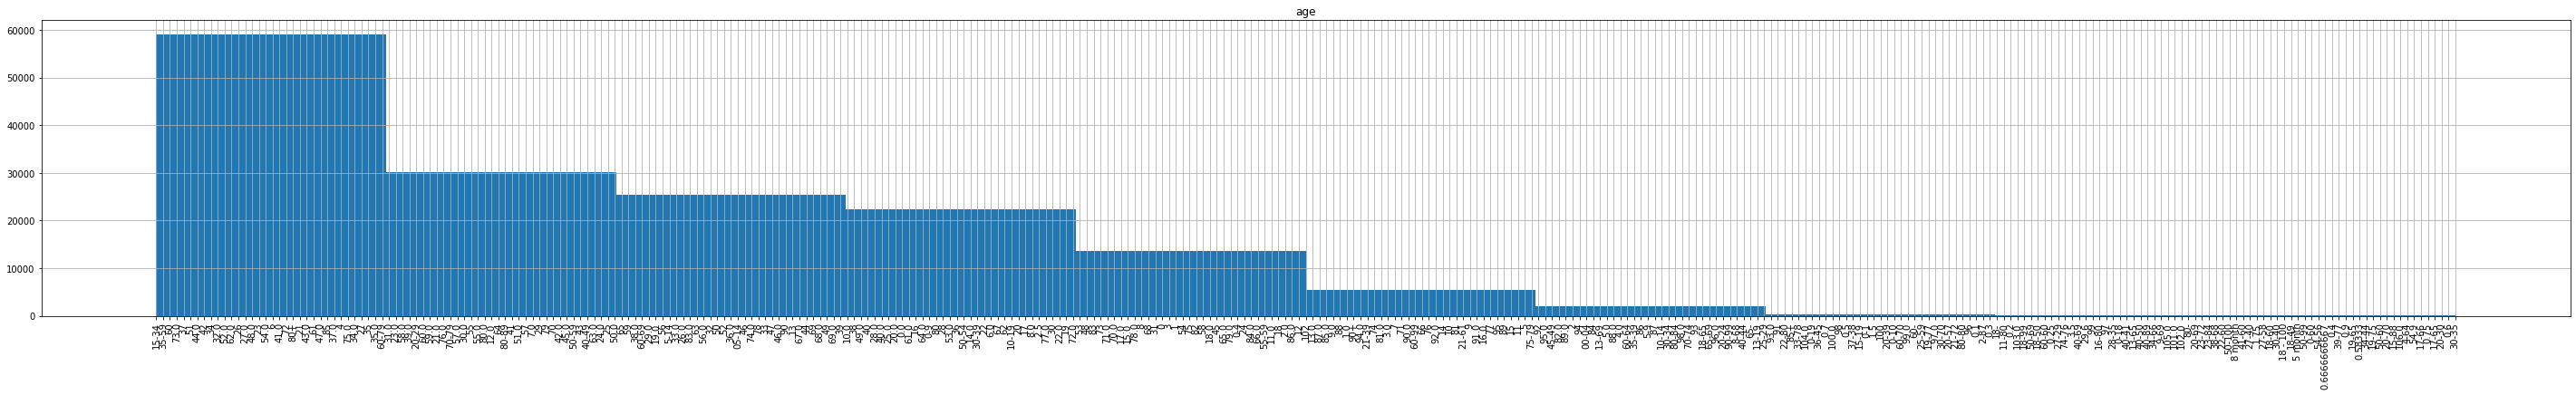

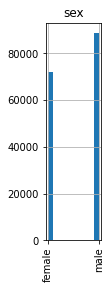

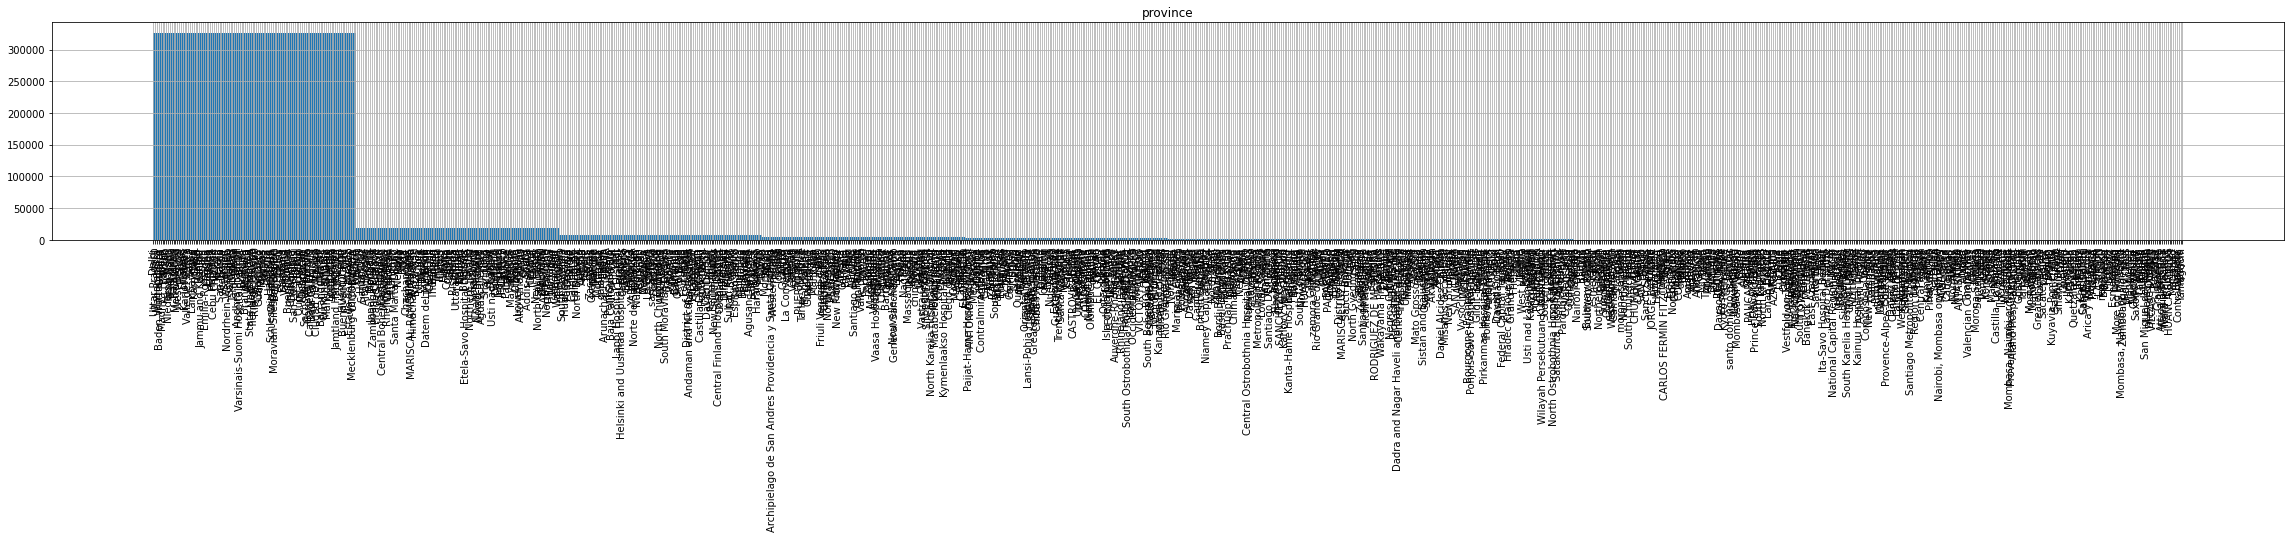

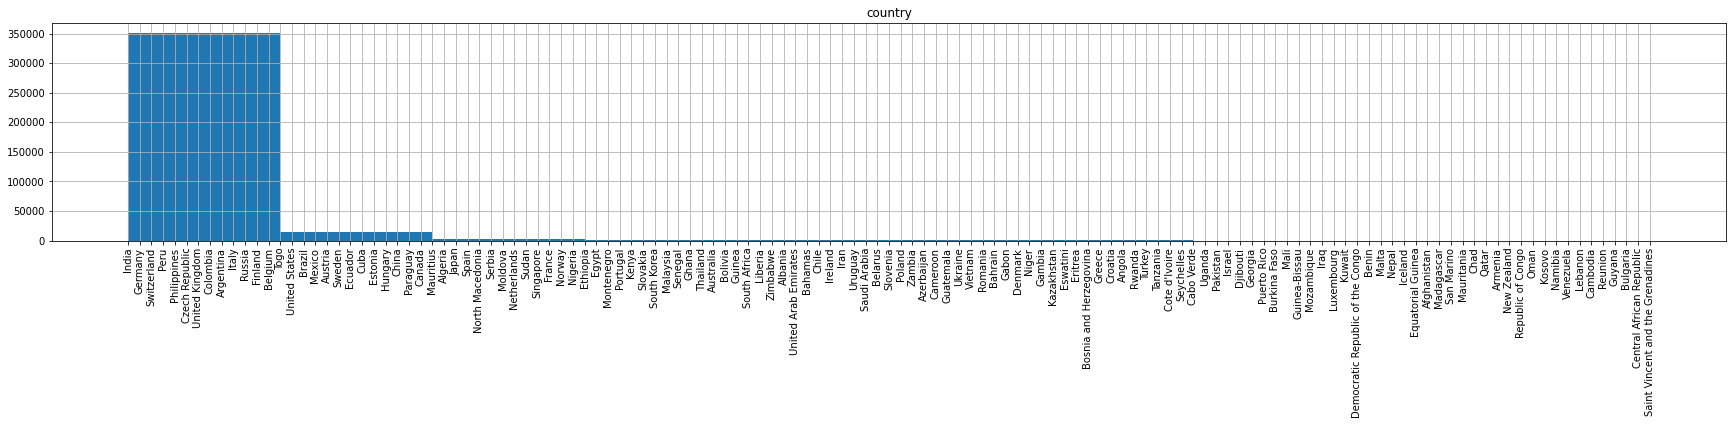

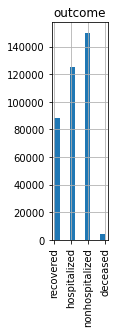

In [112]:
#TODO: ask TA if histogram is appropriate for this section
attribute_hist_fig_sizes = [(50,6),(1,4),(40,4),(30,4),(50,6),(1,4)]
for i, attribute in enumerate(categorical_attributes):
    # source column was exlucded from the histograms. Since it has over 7K unique values, jupyter notebook
    # could not properly render it.
    if attribute == "source":
        continue
    plt.figure()
    plt.title(attribute)
    df[attribute].hist(figsize=attribute_hist_fig_sizes[i], xrot=90)

#### Visualization for date_confirmation

In [136]:
def convert_to_datetime(row):
    date_string = row['date_confirmation']
    if '-' in str(date_string):
        return
    return pd.to_datetime(date_string)

In [137]:
# remove date ranges so data can be plotted
df['converted_datetime'] = df.apply(convert_to_datetime, axis=1)

<AxesSubplot:title={'center':'date_confirmed'}, xlabel='date', ylabel='count'>

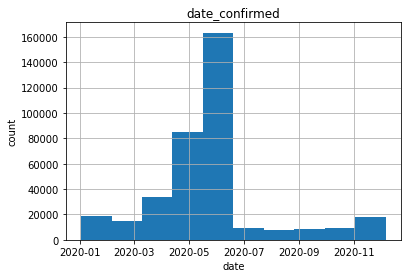

In [146]:
plt.figure()
plt.title('date_confirmed')
plt.ylabel('count')
plt.xlabel('date')
df['converted_datetime'].hist()

#### Visualization for longitude and latitude

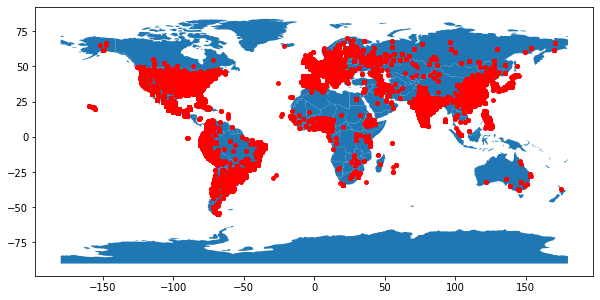

In [110]:
# modified from https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry) 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

## Number of missing values

In [40]:
df.isnull().sum()

age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64